# Data Cleaning Process

## 1. Import Libraries

In [1]:
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt

## 2. Load dataset

In [4]:
df_training = pd.read_csv("../data/processed/lat_lon_imputed.csv") 

In [5]:
df_training.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [6]:
df_training = df_training.set_index('id')

In [ ]:
### Categorical Columns
- permit

#### Categorical columns to be removed

##### Columns to remove at first

In [7]:

df_training = df_training.drop(['wpt_name', 'recorded_by', 'scheme_name'], axis=1)
df_training.shape

(59400, 37)

##### Columns to analyze together:
- funder, installer, *scheme_name


In [8]:
df_training = df_training.drop('num_private', axis=1)
df_training.shape

(59400, 36)

**funder**
Lets check if lowering case can help.

In [9]:
df_training['funder'].value_counts()

funder
Government Of Tanzania    9084
Danida                    3114
Hesawa                    2202
Rwssp                     1374
World Bank                1349
                          ... 
Gil Cafe'church'             1
Ldcdd                        1
Kaaya                        1
Kalitesi                     1
Getdsc00                     1
Name: count, Length: 1896, dtype: int64

In [10]:
df_training['funder'] = df_training['funder'].astype(str).str.lower()
df_training['funder'].value_counts()

funder
government of tanzania    9084
nan                       3637
danida                    3114
hesawa                    2202
rwssp                     1374
                          ... 
nmdc india                   1
bukwang church saint         1
ded/rwssp                    1
kwasenenge group             1
getdsc00                     1
Name: count, Length: 1897, dtype: int64

No difference with lowercase.

#### Numeric Columns

In [11]:
df_training = df_training.drop('public_meeting', axis=1)
df_training.shape

(59400, 35)

### Finding correlation between numeric columns

The values more than ±0.5 show stronger relation between columns

Below is the correlation matrix of the numeric only values, we can later create for categorical columns as well.


In [12]:
# Map the categorical values to numerical values
status_mapping = {'functional': 1, 'non functional': 0, 'functional needs repair': 2}
df_training['status_group'] = df_training['status_group'].map(status_mapping)

# Calculate the correlation matrix
correlation_matrix = df_training.select_dtypes(include='number').corr()

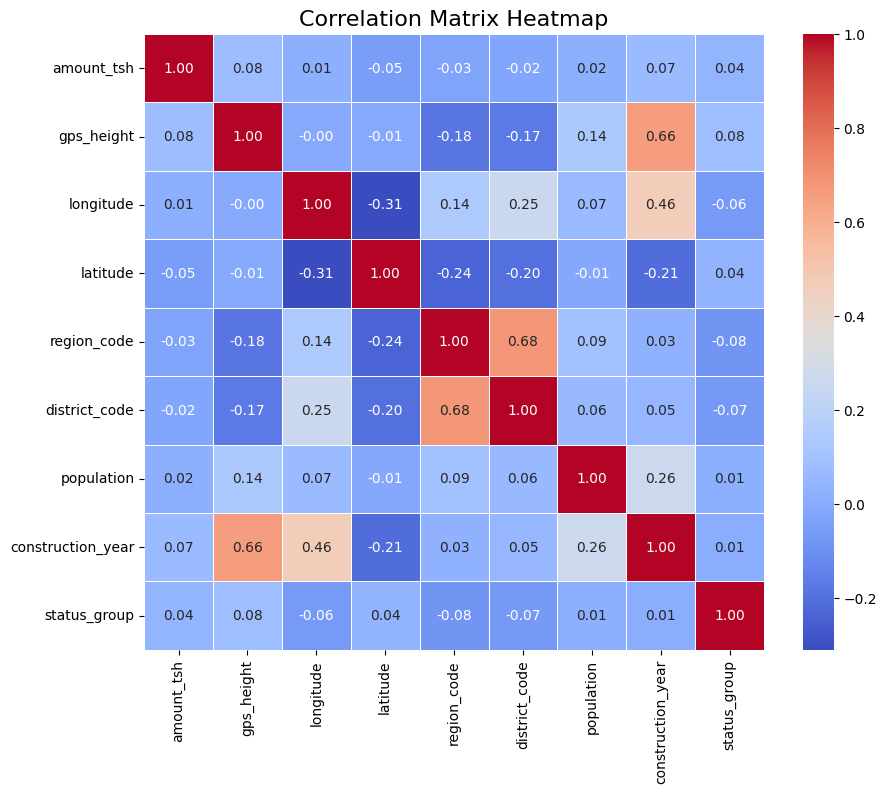

In [13]:
# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Add a title
plt.title("Correlation Matrix Heatmap", fontsize=16)

# Show the plot
plt.show()

In [14]:
categorical_columns = [
    'date_recorded', 'basin', 'scheme_management', 'permit', 
    'extraction_type', 'management', 'payment', 'water_quality', 
    'quantity', 'source', 'waterpoint_type'
]

for column in categorical_columns:
    df_training[column], _ = pd.factorize(df_training[column])

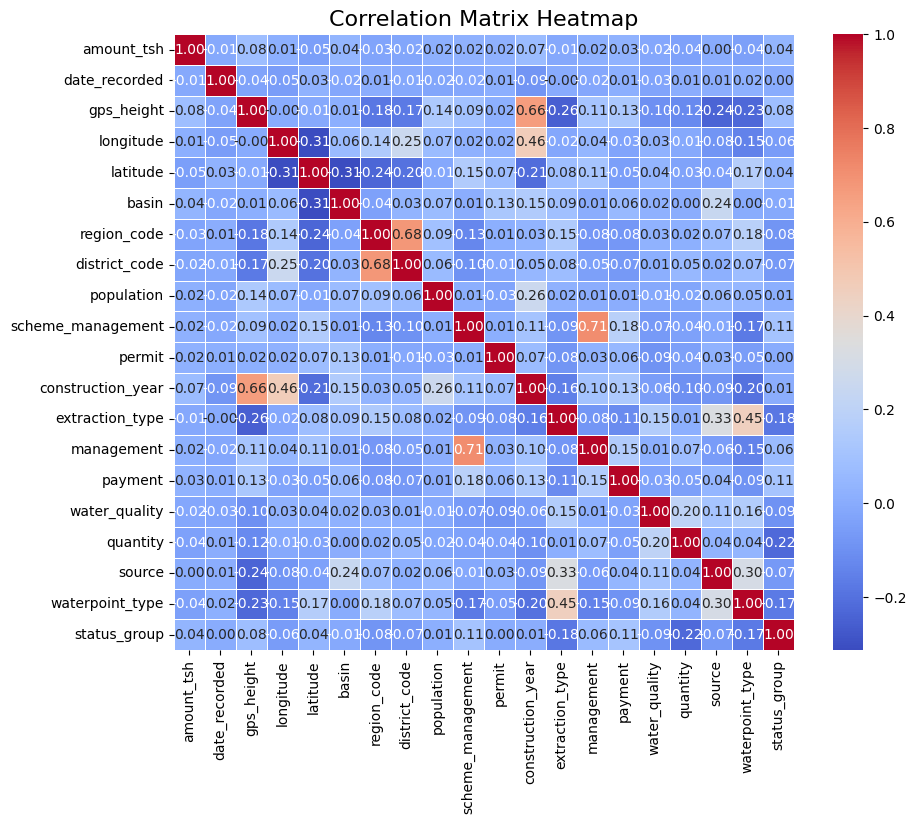

In [15]:
# Recalculate the correlation matrix
correlation_matrix = df_training.select_dtypes(include='number').corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Add a title
plt.title("Correlation Matrix Heatmap", fontsize=16)

# Show the plot
plt.show()

In [16]:
df_training.to_csv("../data/processed/lat_lon_imputed_cleaned.csv", index=False)